## È°πÁõÆÊèê‰∫§
>
- wrangle_act.ipynbÔºöÁî®‰∫éÊî∂ÈõÜ„ÄÅËØÑ‰º∞„ÄÅÊ∏ÖÊ¥ó„ÄÅÂàÜÊûêÂíåÂèØËßÜÂåñÊï∞ÊçÆÁöÑ‰ª£Á†Å (y)
- wrangle_report.pdfÔºöÊ±áÊÄªÊï∞ÊçÆÊï¥ÁêÜÊ≠•È™§ÁöÑÊñáÊ°£ÔºöÊî∂ÈõÜÔºåËØÑ‰º∞ÂíåÊ∏ÖÊ¥ó
- act_report.pdfÔºöÂØπÊúÄÁªàÊï∞ÊçÆËøõË°åËßÇÂØü‰∏éÂàÜÊûêÁöÑÊñáÊ°£
- twitter_archive_enhanced.csvÔºöÁªôÂÆöÁöÑÊñá‰ª∂ (y)  „Äê* WeRateDogs ÁöÑÊé®ÁâπÊ°£Ê°à„Äë
- image_predictions.tsvÔºö‰ª•ÁºñÁ®ãÊñπÂºè‰∏ãËΩΩÁöÑÊñá‰ª∂ (y) „ÄêÂ∑≤‰∏ãËΩΩ„Äë
- tweet_json.txtÔºöÈÄöËøá API ÊûÑÂª∫ÁöÑÊñá‰ª∂ (y) „ÄêÂ∑≤ÁªèÊèê‰æõ„Äë
- twitter_archive_master.csvÔºöÂêàÂπ∂‰∏éÊ∏ÖÊ¥óÂêéÁöÑÊï∞ÊçÆ (y)
- ÂÖ∂‰ªñÈôÑÂä†Êñá‰ª∂Ôºà‰æãÂ¶ÇÔºåÁî®‰∫éÂ≠òÂÇ®Âπ≤ÂáÄÊï∞ÊçÆÁöÑÈôÑÂä†Êñá‰ª∂ÊàñÊï∞ÊçÆÂ∫ìÊñá‰ª∂Ôºâ(y) „ÄêÂõæÁâádog3.jpg„Äë
>

In [2]:
import json
import pandas as pd
import numpy as np
import requests
import os
import re

#### Ëé∑Âèñ‰∏â‰∏™Ë°®Ê†º

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# image_url = ['https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv']
# for url in image_url:
#     response = requests.get(url)
#     with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
#         file.write(response.content)
image = pd.read_csv('image-predictions.tsv',sep='\t')

### `‰øÆÊîπ‰∏Ä`

#### ‰øÆÊîπÂéüÂõ†ÔºöÂÖ®ÈÉ®ËØªÂèñjsonÊñá‰ª∂ÂêéÂÜçÊèêÂèñ3‰∏™ÂàóÔºå‰∏çÂ§üÁÆÄÊ¥Å„ÄÇ


#### ÂéüÊù•ÁöÑ‰ª£Á†ÅÂ¶Ç‰∏ã

In [4]:
# data = []
# with open('tweet_json.txt') as f:
#     for line in f:
#         data.append(json.loads(line))

# add_data = pd.DataFrame(data)

#### ÊîπËøõ‰ª£Á†ÅÔºöÁõ¥Êé•Áî®read_json()ÂáΩÊï∞Ëé∑ÂèñÊâÄÈúÄÁöÑ3‰∏™Âàó„ÄÇ

In [5]:
df_json = pd.read_json('tweet_json.txt',lines=True)[['id', 'retweet_count', 'favorite_count']]
df_json.columns = ['tweet_id', 'retweet_count', 'favorite_count']

#### Êü•ÁúãÂêÑË°®Ê†ºÂ≠òÂú®ÁöÑÈóÆÈ¢ò

In [6]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Áî±‰∫éarchiveÊòØ‰∏ªË¶ÅÊñá‰ª∂ÔºåÂÖàÁúãarchiveËøô‰∏™Êñá‰ª∂ÁöÑÂÜÖÂÆπ„ÄÇ

Âè¶Â§ñ‰∏§‰∏™ÊòØÈôÑÂä†Êñá‰ª∂ÔºåËÄå‰∏îÊöÇÊó∂Ê≤°Êúâ‰ªÄ‰πàÂ§ßÈóÆÈ¢òÔºåÂ∞±ÁÆóÊúâÈóÆÈ¢ò‰πüÈúÄË¶ÅÁ≠âÂà∞Ê∏ÖÁêÜÁöÑÊó∂ÂÄôÊâçËÉΩÂèëÁé∞„ÄÇ

#### Ê≥®ÔºöÊ≠§Â§Ñ‰∏ªË¶ÅÂ±ïÁ§∫ÊúâÈóÆÈ¢òÁöÑÂá†ÂàóÔºå‰∏∫‰∫ÜÁØáÂπÖÁÆÄÊ¥ÅÔºå‰∏ªÊ¨°ÂàÜÊòéÔºåÂÖ∂‰ªñÁªÜËäÇËøáÁ®ãÂ∞±‰∏çÂ±ïÁ§∫‰∫Ü„ÄÇ

In [9]:
# timestampÊï∞ÊçÆÁ±ªÂûãÊòØÂ≠óÁ¨¶ÂûãÔºåÂ∫îËØ•ÊòØÊó∂Èó¥Âûã
archive.timestamp.sample()

2322    2015-11-17 01:40:41 +0000
Name: timestamp, dtype: object

In [10]:
# ËØÑÂàÜÁöÑÂàÜÊØçÂ≠òÂú®170Ôºå2Á≠â‰∏çÂêàÁêÜÁöÑÂÄº
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
# ÂæàÊòéÊòæÔºåÂßìÂêçÊúâNone,a, anÁ≠â‰∏çÂêàÁêÜÁöÑÂÄº
archive.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Penny           10
Tucker          10
Lola            10
Bo               9
Winston          9
the              8
Sadie            8
an               7
Bailey           7
Toby             7
Daisy            7
Buddy            7
Leo              6
Koda             6
Rusty            6
Scout            6
Milo             6
Stanley          6
Oscar            6
Dave             6
Jack             6
Jax              6
Bella            6
Larry            5
              ... 
Lorelei          1
Jazz             1
Colin            1
Biden            1
Pete             1
Jeffri           1
Ralph√©           1
Florence         1
Cheryl           1
Oreo             1
Miguel           1
Carper           1
Caryl            1
Eriq             1
Anthony          1
Evy              1
Ito              1
infuriating      1
Strudel          1
Brat             1
Robin            1
Laika      

In [12]:
# ÊâπÈáèÊü•ÁúãÂÆ†Áâ©ÁãóÂú∞‰ΩçÁöÑÊï∞ÊçÆÊÉÖÂÜµ
list_dog = ['doggo','puppo','floofer','pupper']
for i in list_dog:
    j = archive[i].value_counts()
    print(j)

None     2259
doggo      97
Name: doggo, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64


### `‰øÆÊîπ‰∫å`

#### ‰øÆÊîπÂéüÂõ†Ôºö 
1. Êü•Áúãtext ÊòæÁ§∫‰∏çÂÖ®Ôºå‰∏çÊñπ‰æøÂéª text ÂéüÊñá‰∏≠Ê£ÄÊü•ÂΩìÂâçÊï∞ÊçÆÈõÜ‰∏≠ÁöÑ name„ÄÅÂú∞‰Ωç„ÄÅËØÑÂàÜÁ≠âÊòØÂê¶‰∏éÂéüÊé®ÊñáÂØπÂ∫î„ÄÇ
2. Â§öÊ¨°Áî®forÂæ™ÁéØÔºå‰∏çÂ¶ÇÁî®apply()ÂáΩÊï∞„ÄÇ
3. Ê≤°ÊúâÂ±ïÁ§∫ÂàÜÂ≠êÂàóÁöÑÊ£ÄÊü•ÊÉÖÂÜµÔºåÊèêÂèñËØÑÂàÜÁöÑÊ≠£ÂàôË°®ËææÂºèÊ≤°ÊúâË¶ÜÁõñÂà∞Â∏¶Â∞èÊï∞ÁÇπÁöÑÊµÆÁÇπÂûãÊï∞Â≠ó„ÄÇ


#### ÂéüÊù•ÁöÑ‰ª£Á†ÅÂ¶Ç‰∏ã

In [13]:
# Áî®str.findall()Êù•Ëé∑ÂèñÊâÄÊúâÊÉÖÂÜµ
# archi.rate= archi.text.str.findall('(\d+\/\d+)')
# archi.name = archi.text.str.findall('[^th](?:is|was|named|Meet|to|and|have|will|would|be|can|could|may|that)\s([A-Z][a-z].*?(?=\.))')
# archi.stage = archi.text.str.findall('(doggo|floofer|puppo|pupper)')

In [14]:
# ÂÆö‰πâÊü•ÁúãÂ§öÂÄºÁöÑÂáΩÊï∞
# def find_multiple_value(data):
#     for key,value in enumerate(data):
#         if len(value) > 1:
#             text = archi.text[key]
#             print(key,value,text)

In [15]:
# Êü•ÁúãÂê´ÊúâÂ§ö‰∏™ÂàÜÊï∞ÂÄºÁöÑÂéüÊñá
# find_multiple_value(archi.rate)

In [16]:
# Êü•ÁúãÂê´ÊúâÂ§ö‰∏™ÂßìÂêçÊï∞ÊçÆÁöÑÂéüÊñá
# find_multiple_value(archi.name)

In [17]:
# Êü•ÁúãÂê´ÊúâÂ§ö‰∏™Âú∞‰ΩçÊï∞ÊçÆÁöÑÂéüÊñá
# find_multiple_value(archi.stage)

#### ÊîπËøõ‰ª£Á†ÅÔºö
1. ‰øÆÊîπtextÊü•ÁúãËåÉÂõ¥Ôºõ
2. Â∞ÜforÂæ™ÁéØ‰øÆÊîπ‰∏∫apply;
3. Â¢ûÂä†ÂàÜÂ≠êÂàóÁöÑÊü•ÁúãÔºå‰øÆÊîπÊ≠£ÂàôË°®ËææÂºèÔºå‰ª•Êü•Áúã9.75ËøôÁßçÊµÆÁÇπÊï∞ÁöÑÂàÜÂ≠êÊ≠£ÂàôË°®ËææÂºè

In [18]:
# ËØÑÂàÜ/ÂßìÂêç/Âú∞‰ΩçÈÉ®ÂàÜÊØîËæÉÂ§çÊùÇÔºå‰øùÈô©Ëµ∑ËßÅÔºåÂÖàÂ§á‰ªΩ‰∏Ä‰ªΩ
archi = archive.copy()

In [19]:
# Êü•ÁúãÂºÇÂ∏∏ÂàÜÂ≠êÂàÜÊØçÂØπÂ∫îÁöÑtext
pd.set_option('max_colwidth',200)
archi.query('rating_denominator!=10 | rating_numerator > 20')[['text','rating_numerator','rating_denominator']]

text  \
188                                                                                      @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research   
189                                       @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
290                                                                                                                                                          @markhoppus 182/10   
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
340                                RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu‚Ä¶   
342                                                                                                                                    @docmisterio account started on 11/15/15   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
695                                            This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763           This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
784                                RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/‚Ä¶   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
979                                                                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1068                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1598                                   Yes I do re

In [20]:
# Êü•ÁúãÂ§ö‰∏™ËØÑÂàÜÂØπÂ∫îÁöÑtext
archi['scores'] = archi.text.str.findall('((?:\d+\.)?\d+\/\d+)')
archi['score_counts'] = archi['scores'].apply(lambda x: len(set(x)))
archi.query('score_counts>1')[['text','scores','score_counts']]

text  \
55                                                            @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s   
313                                                    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
561                    RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ   
766                                   "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ   
784          RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/‚Ä¶   
860          RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/‚Ä¶   
1007                     This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ   
1068         After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1165                                                                                     Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1222     Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE   
1359               This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf   
1459           This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P   
1465  Meet Olivi√©r. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ   
1508     When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM   
1525       This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf   
1538  Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c   
1662          This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1795    Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C   
1832            These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog https://t.co/gwryaJO4tC   
1897     Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 &amp; 4/10 https://t.co/KNfLnYPmYh   
1901        Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD   
1970         Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg   
2010                                                      10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k   
2064      Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10 https://t.co/RcksaUrGNu   
2113              Meet Hank and Sully. Hank is very proud of t

#### Ê≥®ÔºöÂßìÂêçÂíåÂú∞‰ΩçÈÉ®ÂàÜÂú®text‰∏≠ÁöÑÂºÇÂ∏∏ÊÉÖÂÜµÂ∞ÜÂú®Ê∏ÖÁêÜÈÉ®ÂàÜÂ±ïÁ§∫

## Êï∞ÊçÆÂ≠òÂú®ÁöÑÈóÆÈ¢ò

### Ë¥®Èáè

##### 1. ÊúâÊïàÊÄß

- Â≠òÂú®ÈùûtweetÁΩëÁ´ôÁöÑÂéüÂßãÊï∞ÊçÆÔºå‰ªéÂÖ∂‰ªñÁΩëÁ´ôËΩ¨ÂèëÂà∞tweetÁöÑÊï∞ÊçÆ‰∏çËÉΩÁî®„ÄÇ„Äê‰øÆÊîπ‰∏∫ÔºöÂ≠òÂú®‰∏çÁ¨¶Âêà‚ÄúÂê´ÊúâÂõæÁâáÁöÑÂéüÂßãËØÑÁ∫ßÔºà‰∏çÂåÖÊã¨ËΩ¨ÂèëÔºâ‚ÄùÁöÑÊï∞ÊçÆ„Äë

##### 2. ÂÆåÊï¥ÊÄß

- archiveË°®Ê†º‰∏≠ÁöÑin_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urlsËøôÂá†ÂàóÔºåÂ≠òÂú®Â§ßÈáèÁº∫Â§±ÂÄº„ÄÇ
- archive‰∏≠ÁöÑnameÂê´ÊúâÂ§ßÈáèÂÄº‰∏∫‚ÄúNone‚ÄùÔºåËØ¥ÊòéÊúâÁº∫Â§±‰ø°ÊÅØ„ÄÇ
- Â∞èÁãóÁöÑÂú∞‰ΩçÊï∞ÊçÆÂê´Â§ßÈáèÁº∫Â§±‰ø°ÊÅØ„ÄÇ

##### 3. ‰∏ÄËá¥ÊÄß

- ‰∏âÂº†Ë°®ÁöÑidÂàóÊï∞ÊçÆÁ±ªÂûãÂíåÂàóÂêçÁß∞‰∏çÁªü‰∏Ä„ÄÇ
- archiveË°®Ê†º‰∏≠ÁöÑtimestampÂàóÂÜÖÂÆπÊòØË°®Êó∂Èó¥Ôºå‰ΩÜÊï∞ÊçÆÁ±ªÂûã‰∏çÊòØÊó∂Èó¥Âûã„ÄÇ

##### 4. ÂáÜÁ°ÆÊÄß

- name‰∏ÄÂàóÈáåÊúâ745‰∏™NoneÔºå55‰∏™aÔºå7‰∏™anÔºåËøô‰∫õÈÄöÂ∏∏‰∏çÊòØÁãóÁöÑÂêçÂ≠ó„ÄÇ
- Ê†πÊçÆrating_numeratorÂíårating_dominatorÔºåÂÜçÁªìÂêàtextÂéüÊñáÂÜÖÂÆπÂèëÁé∞ÔºåËØÑÂàÜÁöÑÈÄâÂèñÂ≠òÂú®ÈîôËØØÔºåÊúâÁöÑÊï∞ÊçÆÊòØÊó•ÊúüÂ¶Ç9/11„ÄÅ11/15/15ÔºõÊúâÁöÑÊï∞ÊçÆÂ¶Ç960/00„ÄÅ3 1/2Ëøô‰∫õ‰πü‰∏çÊòØËØÑÂàÜ„ÄÇ


### Êï¥Ê¥ÅÂ∫¶

##### ÂÆö‰πâÔºö‚Äú‰∏çÁ¨¶Âêà‚ÄúÊØè‰∏™ÂèòÈáèÊûÑÊàê‰∏ÄÂàóÔºåÊØè‰∏™ËßÇÂØüÂÄºÊûÑÊàê‰∏ÄË°åÔºåÊØè‰∏™ËßÇÂØüÂçïÂÖÉÊûÑÊàê‰∏Ä‰∏™Ë°®Ê†º‚Äù
- doggoÔºåflooferÔºåpupperÔºåpuppoÈÉΩÊòØÁãóÁöÑÂú∞‰ΩçÔºåÂ∫îËØ•ÂçïÁã¨‰∏∫‰∏ÄÂàó„ÄÇ
- ÂæàÂ§ötextÂàó‰∏≠Âê´Êúâ‰∏§‰∏™Âèä‰ª•‰∏äÁöÑrateÔºånameÔºåstageÊï∞ÊçÆ„ÄÇ„ÄêÂà†ÊéâÔºåÂõ†‰∏∫textÊú¨Ë∫´‰∏çÂ≠òÂú®ÈóÆÈ¢ò„Äë
- „ÄêÂ¢ûÂä†Ôºö‰∏â‰∏™ÂõæË°®ÈÉΩÊòØ‰ª• tweet_id ‰∏∫ËßÇÂØüÂçïÂÖÉÔºåËøùÂèç‰∫ÜÊï¥Ê¥ÅÂ∫¶Ë¶ÅÊ±ÇÁöÑÊúÄÂêé‰∏ÄÊù° ‚ÄúEach type of observational unit forms a table‚ÄùÔºåÊâÄ‰ª•ÈúÄË¶ÅÂêàÂπ∂‰∏∫‰∏Ä‰∏™Ë°®Ê†º„ÄÇ„Äë

# Ê∏ÖÁêÜÊï∞ÊçÆ

### 1.Âà†Èô§ËΩ¨ÂèëÊï∞ÊçÆ

In [21]:
index = archive.index[archive.retweeted_status_timestamp.notnull()]
for i in index:
    archive.drop(i,inplace = True)

In [22]:
# Ê£ÄÊü•ÊòØÂê¶Ë¢´Âà†Êéâ
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [23]:
# archive[archive['text'].str.contains('http://t.co/cLyzpcUcMX')[['text']]

### ‰øÆÊîπ‰∏â

#### ‰øÆÊîπÂéüÂõ†ÔºöÊ≤°ÊúâÊèêÂâçÂêàÂπ∂Êï∞ÊçÆÔºåÂõ†‰∏∫ÂêàÂπ∂Êï∞ÊçÆÂêéÔºåÂ∞±Ê∏ÖÁêÜÊéâ‰∫ÜÊ≤°ÊúâÂõæÁâáÁöÑÊï∞ÊçÆ

#### Êñ∞Â¢û‰ª£Á†ÅÂ¶Ç‰∏ã

### 2.  ÂêàÂπ∂‰∏â‰ªΩÊï∞ÊçÆ

In [24]:
archive1 = pd.merge(archive,df_json,on=["tweet_id"],how="inner" )
archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                 2175 non

In [25]:
archive = pd.merge(archive1,image,on=["tweet_id"],how="inner" )
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 1994 non

### 4.Âà†Èô§Âê´ÊúâÂ§ßÈáèÁº∫Â§±ÂÄºÁöÑÂàó

In [26]:
archive.drop(['in_reply_to_status_id','in_reply_to_user_id',
            'retweeted_status_id','retweeted_status_user_id',
            'retweeted_status_timestamp'], axis=1, inplace=True)

In [27]:
#Ê£ÄÊü•Áº∫Â§±ÂàóÊòØÂê¶Ë¢´Âà†Èô§
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null floa

### 3.Êõ¥ÊîπtimestampÂàóÊï∞ÊçÆÁ±ªÂûã

In [28]:
archive.timestamp = pd.to_datetime(archive.timestamp)

In [29]:
#Ê£ÄÊü•Êï∞ÊçÆÁ±ªÂûã
archive.timestamp.sample(1).dtype

datetime64[ns, UTC]

### 5.ËØÑÂàÜ/ÂßìÂêç/Âú∞‰ΩçÁöÑÂ§öÂÄºÈóÆÈ¢òÔºö


Ê†πÊçÆtextÂàóÔºàÈôÑÂä†expanded_urlsÂàóÔºâÊâæÂà∞ÂéüÊñáÂêéÂèëÁé∞ÔºåÂêå‰∏ÄÊù°Êé®ÁâπÈáåÂ≠òÂú®Â§ö‰∏™ËØÑÂàÜ„ÄÅÂßìÂêç„ÄÅÂú∞‰ΩçÁöÑÊï∞ÊçÆ„ÄÇËøôÊ†∑ÁöÑÊÉÖÂÜµÈÄöÂ∏∏ÊòØÂõ†‰∏∫Ôºö

1. Âêå‰∏ÄÊù°Êé®ÁâπÈáåÊèêÂà∞‰∫Ü‰∏§‰∏™Âèä‰ª•‰∏äÁöÑÊèèËø∞ÂØπË±°ÔºåÂç≥Â§öÂè™ÂÆ†Áâ©ÁãóÔºåÂõ†Ê≠§ËøôÊù°Êé®ÁâπÈáåÂ∞±Âê´Êúâ‰∏§‰∏™Âèä‰ª•‰∏äÁöÑËØÑÂàÜ/ÂßìÂêç/Âú∞‰ΩçÔºõ

2. ËøòÊúâ‰∏ÄÁßçÊÉÖÂÜµÊòØÔºåÂèØËÉΩÁúüÊ≠£ÊúâÊïàÁöÑËØÑÂàÜ/ÂßìÂêç/Âú∞‰ΩçÂÖ∂ÂÆûÂè™Êúâ‰∏Ä‰∏™ÂÄº„ÄÇ

‰æãÂ¶ÇÔºö

>ËØÑÂàÜ‰æãÂ≠êÔºö"Meet Eve. She's a raging alcoholic 8/10 (would be 11/10 but pupper alcoholism is a tragic issue that I can't condone)"

> ÂßìÂêç‰æãÂ≠êÔºö"This is Cermet, Paesh, and Morple. They are absolute h*ckin superstars. 14/10 for all"

> Âú∞‰Ωç‰æãÂ≠êÔºö"He's a sophisticated doggo. Also pointier than your average pupper"

### Ëß£ÂÜ≥ÊÄùË∑ØÔºö

‰∏∫‰∫ÜÊï∞ÊçÆÁöÑÊï¥Ê¥ÅÂ∫¶ÔºåÊàëÂÜ≥ÂÆöÊØèÊù°Êé®ÁâπÂè™Âèñ‰∏Ä‰∏™ËØÑÂàÜ/ÂßìÂêç/Âú∞‰ΩçÁöÑÂÄº„ÄÇ„Äê‰øÆÊîπ‰∏∫Ôºö...stage‰øùÁïôÊâÄÊúâÁöÑÂÄº„Äë

ÂàÜÊûêÂéüÊñáÂÜÖÂÆπÔºå‰æãÂ¶ÇÔºö

- ËØÑÂàÜ‰æãÂ≠ê‰∏≠Ôºå8/10ÊòØÊúâÊïàÁöÑËØÑÂàÜÔºå11/10ÊòØËôöÊãüËØ≠Ê∞îÁöÑË°®ËææÔºåÁõ∏ÂØπÊó†Êïà„ÄÇ
- ÂßìÂêç‰æãÂ≠ê‰∏≠Ôºå14/10ÊòØÂØπCermet, Paesh, and MorpleËøô‰∏âÂè™ÁãóÁöÑÊï¥‰ΩìËØÑÂàÜ„ÄÇ‰ªªÂèñ‰∏Ä‰∏™ÂßìÂêçÈÉΩÊúâÊïà„ÄÇ
- Âú∞‰Ωç‰æãÂ≠ê‰∏≠ÔºådoggoÊòØÂØπ‰∏ªË¶ÅÊèèËø∞ÂØπË±°ÁöÑÂú∞‰ΩçËØÑ‰ª∑ÔºåËÄåpupperÂØπÂ∫îÁöÑÊòØÂÖ∂ÂÆÉÂØπË±°„ÄÇ

ÊâÄ‰ª•ÔºåÂ§ßÈÉ®ÂàÜÊÉÖÂÜµ‰∏ãÔºåÊØèÊù°Êé®ÁâπÁöÑ`Á¨¨‰∏Ä‰∏™`ËØÑÂàÜ/ÂßìÂêç/Âú∞‰ΩçÂÄºÁõ∏ÂØπÊõ¥ÊúâÊïà„ÄÇ


Âõ†‰∏∫findall()ÊèêÂèñÁöÑÊòØÂàóË°®ÔºåËÄåÂ§ßÂ§öÊï∞ËØÑÂàÜ/ÂßìÂêçÂè™Êúâ‰∏Ä‰∏™ÂÄºÔºåÊàëÈúÄË¶Å‰ªéÂ§ßÈáèÂàóË°®ÈáåÂèñÂá∫ÈÇ£Âçï‰∏™ÂÄºÔºåËøôÊ†∑Ê≠•Â∫èÁπÅÁêêËÄå‰∏îÊØîËæÉËÄóÊó∂„ÄÇ

#### ÊâÄ‰ª•ÊúÄÂêéÁî®str.extract()Ëé∑ÂèñÊØèÊù°Êé®Áâπtext‰∏≠ÁöÑÁ¨¨‰∏Ä‰∏™ÂàÜÊï∞/ÂßìÂêç„ÄÇ

#### ÁÑ∂ÂêéÂÜçÁ≠õÈÄâÂá∫ÂºÇÂ∏∏ÂÄºÂèäÂÖ∂Á¥¢ÂºïÔºåÊ†πÊçÆÁ¥¢ÂºïÈáçÊñ∞Âà∞textÈáåÊâæÂá∫Á¨¨‰∫å‰∏™Êõø‰ª£ÂÄº„ÄÇ


### `‰∫åÊ¨°‰øÆÊîπÔºà3Ôºâ`„ÄêÔºà1ÔºâÔºà2ÔºâÂú®ÂêéÈù¢„Äë

#### ‰øÆÊîπÂéüÂõ†Ôºö ÂøΩÁï•‰∫Ü`‚Äústage ÂéüÊú¨ÁöÑÂõõÂàóÊï∞ÊçÆ‰∏≠Â∞±ËÆ∞ÂΩï‰∫ÜÂ§ö‰∏™ÂÄºÁöÑÊÉÖÂÜµ‚Äù`

#### ‰øÆÊîπ‰∏∫ÔºöÂÖ≥‰∫éÂú∞‰ΩçÊï∞ÊçÆÁöÑÂ§öÂÄºÊÉÖÂÜµÔºå‰∏ÄÊòØÂõ†‰∏∫Âú∞‰ΩçÊï∞ÊçÆ‰∏çÂèÇ‰∏éÈáèÂåñËÆ°ÁÆóÔºå‰øùÁïôÊâÄÊúâÂÄºÊòØÂêàÁêÜÁöÑÔºõ‰∫åÊòØÂéüË°®Ê†º‰∏≠Â∞±Â≠òÂú®Â§öÂÄºÔºåÂõ†Ê≠§‰ª•ÂéüË°®Ê†º‰∏∫‰∏ª„ÄÇ

### 5.1 Â§ÑÁêÜËØÑÂàÜÈóÆÈ¢ò

In [30]:
archi = archive.copy()

In [31]:
# Áî®str.extract()Ëé∑ÂèñÊØèÊù°Êé®Áâπtext‰∏≠ÁöÑÁ¨¨‰∏Ä‰∏™ÂàÜÊï∞
archi['rate']= archi.text.str.extract('((?:\d+\.)?\d+\/\d+).*')

In [32]:
# Ê£ÄÊü•Âê´Â∞èÊï∞ÁÇπÁöÑÂàÜÊï∞ÊòØÂê¶Ë¢´ÊèêÂèñ
archi[archi['rate']=='9.75/10']

tweet_id                 timestamp  \
503  786709082849828864 2016-10-13 23:23:56+00:00   

                                                                                 source  \
503  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                 text  \
503  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   

                                                       expanded_urls  \
503  https://twitter.com/dog_rates/status/786709082849828864/photo/1   

     rating_numerator  rating_denominator   name doggo floofer  ...  \
503                75                  10  Logan  None    None  ...   

             p1   p1_conf  p1_dog           p2   p2_conf  p2_dog    p3  \
503  Pomeranian  0.467321    True  Persian_cat  0.122978   False  chow   

      p3_conf  p3_dog     rate  
503  0.102654    True  9.75/10  

[1 rows x 26 columns]

In [33]:
# Á≠õÈÄâÂπ∂Êü•ÁúãÂàÜÊØç‰∏ç‰∏∫10ÁöÑÂàÜÊï∞Ôºå‰ª•Âèätext‰∏≠Âê´ÊúâÁöÑÊâÄÊúâÂàÜÊï∞
for k,v in enumerate(archi.rate):
    if not re.search('\/10',v):
        rate = re.findall('(\d+\/\d+)',archi.text[k])
        if len(rate)>1:
            print(k,v,rate)
# ‰ªéÂ∑¶ÂæÄÂè≥ÂàÜÂà´ÂØπÂ∫îÔºöÁ¥¢ÂºïÔºåÁ¨¨‰∏Ä‰∏™ÂàÜÊï∞ÔºåÁ¥¢ÂºïÂØπÂ∫îÁöÑtext‰∏≠ÊâÄÊúâÂàÜÊï∞

800 9/11 ['9/11', '14/10']
891 4/20 ['4/20', '13/10']
925 50/50 ['50/50', '11/10']
1328 7/11 ['7/11', '10/10']
1973 1/2 ['1/2', '9/10']


In [34]:
# Áî®ÊèêÂèñÁöÑÁ¨¨‰∫å‰∏™ÂÄºÊõøÊç¢Ââç‰∏Ä‰∏™ÂÄº
dict_alter ={}
count = 0
for k,v in enumerate(archi.rate):
    if not re.search('\/10',v):
        rate = re.findall('(\d+\/\d+)',archi.text[k])
        if len(rate)>1:
            dict_alter[k] = rate[1]
count+=1

In [35]:
dict_alter.keys()

dict_keys([800, 891, 925, 1328, 1973])

In [36]:
for k in dict_alter.keys():
    #Â∞ÜÊ∏ÖÁêÜÂ•ΩÁöÑÂÄºËµãÂÄºÁªôËØÑÂàÜÂàó„ÄÇ
    archi.rate[k] = dict_alter[k]

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Ê≥®Ôºö
- Á≠õÈÄâÂ§ÑÁêÜÂêéÂâ©‰∏ãÁöÑÂàÜÊØç‰∏ç‰∏∫10ÁöÑËØÑÂàÜÔºå‰ΩÜÁªèËøáÊü•ÁúãÂéüÊñáÔºåÂèëÁé∞‰æùÁÑ∂ÂêàÁêÜ„ÄÇ
- ÊúÄÂêéÂ∞ÜËøô‰∫õËØÑÂàÜÂÖ®ÈÉ®ÂèòÊàêÂèØËÆ°ÁÆóÁöÑÊµÆÁÇπÂûãÔºåÂ∞±ÂèØ‰ª•ÂæóÂà∞ÂêàÁêÜÁöÑÂÄº

In [37]:
# ËΩ¨Âåñ‰∏∫ÊµÆÁÇπÂûã
num = archi.rate.str.split('/')

number = []
count=1
for i in num:
    n = float(i[0])/float(i[1])*10
    number.append(n)
count+=1  

archi.rate = number

In [38]:
archi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 26 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 

### 5.2. Êï¥ÁêÜÂßìÂêç/Âú∞‰ΩçÊï∞ÊçÆ

### ‰øÆÊîπÂõõ

#### ‰øÆÊîπÂéüÂõ†ÔºönameÊèêÂèñ‰∏çÂ§üË∞®ÊÖé„ÄÇÊúâ‰∫õÂéüÊúâÁöÑÂêçÂ≠óÊ≤°ÊúâË¢´ÊèêÂèñÂà∞

#### ÂéüÊù•ÁöÑ‰ª£Á†ÅÂ¶Ç‰∏ã

In [39]:
# archi.name = archi.text.str.extract('[^th](?:is|was|named|Meet|to|and|have|will|would|be|can|could|may|that)\s([A-Z][a-z]+[√°√∂√©√≤√≥]?).*')

#### ÊîπËøõ‰ª£Á†ÅÔºö ÁªôË¢´ÊèêÂèñÁöÑnameÊñ∞Âª∫‰∏ÄÂàóÔºåÂØπÊØî‰πãÂâçÁöÑnameÔºåÂèëÁé∞ÈóÆÈ¢òÂπ∂ÊîπËøõ„ÄÇ

In [40]:
archi['new_name'] = archi.text.str.extract('(?:This is|named|Meet|hello to|name is|Here we have|Here is)\s([A-Z]+[a-z√°√∂√©√≤√≥].*?(?=\.|\,|\s))')

In [41]:
# ËÆæÁΩÆÊñ∞Êóßname‰ªªÊÑè‰∏Ä‰∏™‰∏ç‰∏∫Á©∫ÂÄºÁöÑÊù°‰ª∂Ôºà1Ôºâ
one_value_mask = (archi['name']!='None')|(archi['new_name'].notna())
# ËÆæÁΩÆÂú®Êù°‰ª∂Ôºà1Ôºâ‰∏ãÊñ∞nameÂíåÂéüÊù•name‰∏ç‰∏ÄËá¥ÁöÑÊù°‰ª∂Ôºà2Ôºâ
test_mask = (archi.name!= archi.new_name)&(one_value_mask)
# Â±ïÁ§∫Êù°‰ª∂Ôºà2Ôºâ‰∏ãÁöÑÂÖ∑‰ΩìÊÉÖÂÜµ
archi.loc[test_mask,['text','name','new_name']]

text  \
21                                  I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba   
49           Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF   
134     Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0   
135                 We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9   
149   Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x   
275                                                             Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK   
397                     Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho   
404                  We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi   
472                                     Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq   
561                                                This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC   
582                         Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn   
596                          We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d   
622                               This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB   
681                         This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k   
734                             What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX   
738                          That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7   
739                         This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd   
746                         This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW   
748                           Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R   
757                               This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2   
762                           This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt   
768                         We only rate dogs. Pls stop sending in non-canines like this Jamaican Flop Seal. This is very very frustrating. 9/10 https://t.co/nc53zEN0hZ   
783                           This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa   
795                                 

#### Áî±‰∫énotebookÈáåÈù¢ÊúâÊäòÂè†ÔºåÊ£ÄÊü•‰∏çÂÆåÂÖ®ÈÉ®ÂÜÖÂÆπÔºåÂõ†Ê≠§‰∏ãÈù¢‰ª•50‰∏∫Âçï‰ΩçÔºåÂàÜÂùóÊ£ÄÊü•

In [42]:
archi.loc[test_mask,['text','name','new_name']][:50]

text  \
21                                  I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba   
49           Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF   
134     Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0   
135                 We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9   
149   Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x   
275                                                             Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK   
397                     Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho   
404                  We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi   
472                                     Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq   
561                                                This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC   
582                         Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn   
596                          We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d   
622                               This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB   
681                         This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k   
734                             What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX   
738                          That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7   
739                         This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd   
746                         This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW   
748                           Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R   
757                               This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2   
762                           This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt   
768                         We only rate dogs. Pls stop sending in non-canines like this Jamaican Flop Seal. This is very very frustrating. 9/10 https://t.co/nc53zEN0hZ   
783                           This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa   
795                                 

In [43]:
archi.loc[test_mask,['text','name','new_name']][50:100]

text  \
1398      Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC   
1407                                                                   This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE   
1441                                           This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND   
1452                                                  This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb   
1469                                                        This is the saddest/sweetest/best picture I've been sent. 12/10 üò¢üê∂ https://t.co/vQ2Lw1BLBF   
1503      This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI   
1504                                  Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj   
1527         C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2   
1528                             This is a fluffy albino Bacardi Columbia mix. Excellent at the tweets. 11/10 would hug gently https://t.co/diboDRUuEI   
1569                                                    This is a Sagitariot Baklava mix. Loves her new hat. 11/10 radiant pup https://t.co/Bko5kFJYUU   
1582                                                   This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd   
1586            This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl   
1600       This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3   
1639                                              This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe   
1646                                        This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt   
1664                                                                 This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP   
1675       This is space pup. He's very confused. Tries to moonwalk at one point. Super spiffy uniform. 13/10 I love space pup https://t.co/SfPQ2KeLdq   
1679          This is a Tuscaloosa Alcatraz named Jacob (Yac≈çb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7   
1682  This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU   
1685      This is JD (stands for "just dog"). He's like Airbud but with trading card games instead of sports. 10/10 much skill https://t.co/zzueJV9jCF   
1710      This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr   
1760       This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo   
1769         This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj   
1772        This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN   
1790        This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX   
1796       This is a brave dog. Excellent free climber. Trying to get closer to God. Not very loyal though. Doesn't bark. 5/10 https://

In [44]:
archi.loc[test_mask,['text','name','new_name']][100:150]

text  \
1972    This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0   
1973      This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   
1983                                   This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK   
1984       Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p   
1985                  My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O   
1986  Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt   
1987    This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc   
1988  This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe   
1990     This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
1991            Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   
1992   This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   

     name new_name  
1972    a      NaN  
1973   an      NaN  
1983  the      NaN  
1984  the      NaN  
1985    a      NaN  
1986    a      NaN  
1987   an      NaN  
1988    a      NaN  
1990    a      NaN  
1991    a      NaN  
1992    a      NaN

In [45]:
# Êäänew_nameËµãÂÄºÁªôname
archi['name'] = archi['new_name']

### `‰∫åÊ¨°‰øÆÊîπÔºà1Ôºâ`

#### ‰øÆÊîπÂéüÂõ†:  stageÂ≠òÂú®ÁöÑÂ§öÂÄºÈúÄË¶Å‰øùÁïô

#### ÂéüÊù•ÁöÑ‰ª£Á†ÅÂ¶Ç‰∏ã

In [46]:
# archi['stage'] = archi.text.str.extract('(doggo|floofer|puppo|pupper).*')

### ÊîπËøõ‰ª£Á†ÅÔºö
1. ÂÖ®ÈÉ®Âåñ‰∏∫Â∞èÂÜôÂ≠óÊØçÂêéÔºåÁî®findall()Ëé∑ÂèñÊâÄÊúâÊÉÖÂÜµÔºõ
2. Áî®‚ÄúÔºå‚ÄùËøûÊé•Â§ö‰∏™ÂÄºÔºå‰ΩøÂÖ∂ÂÖ±Âêå‰Ωú‰∏∫stageÁöÑÂÄº„ÄÇ

In [47]:
# Âä†‰∫Ü‰∏™ .str.lower()ÔºåÈÅøÂÖçÊèêÂèñ‰∏çÂà∞Â§ßÂ∞èÂÜô‰∏çÂêåÁöÑ stage
archi['stage']=archi.text.str.lower().str.findall('(doggo|pupper|puppo|floofer)')

# ÂØπ stage Âàó‰ΩøÁî® set Êù•ÂéªÈáçÔºåÈÅøÂÖçÂá∫Áé∞Êé®Êñá‰∏≠ÈáçÂ§çÊüê‰∏Ä‰∏™ stageÔºå‰ΩÜÊòØË¢´ÊèêÂèñÂ§öÊ¨°ÔºåÁÑ∂ÂêéË∞ÉÁî®ÂåøÂêçÂáΩÊï∞Ôºå‰ΩøÂÖ∂ join ‰∏∫Â≠óÁ¨¶‰∏≤
archi['stage'] = archi['stage'].apply(lambda x: ','.join(set(x)))

In [48]:
# ÊõøÊç¢ÂÖ∂‰∏≠ÁöÑÁ©∫ÂÄº‰∏∫ np.nan
archi['stage'].replace('', np.nan, inplace = True)

In [49]:
archi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 28 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1379 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 

In [50]:
# Âà†Èô§Â§ö‰ΩôÂàó
archi.drop(['doggo','floofer','pupper','puppo','rating_numerator','rating_denominator','new_name'],axis=1,inplace = True)

In [51]:
archi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id          1994 non-null int64
timestamp         1994 non-null datetime64[ns, UTC]
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1379 non-null object
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
rate              1994 non-null float64
stage             342 non-null object
dtypes: bool(3), datetime64[ns, UTC](1), float64(4), int64(4), objec

### ‰øÆÊîπ‰∫î
#### ‰øÆÊîπÂéüÂõ†ÔºöÊñ∞Êñá‰ª∂ÈáåÂá∫Áé∞‰∫ÜUnnamed: 0

In [52]:
# archi.to_csv('twitter_archive_master.csv')
# file = pd.read_csv('twitter_archive_master.csv')
# file.info()

#### ÊîπËøõ‰ª£Á†ÅÔºöÂ¢ûÂä†ÂèÇÊï∞index=False

In [53]:
archi.to_csv('twitter_archive_master.csv',index=False)
data = pd.read_csv('twitter_archive_master.csv')
# Ê£ÄÊü•ÊòØÂê¶ÊúâÈóÆÈ¢ò
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id          1994 non-null int64
timestamp         1994 non-null object
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1379 non-null object
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
rate              1994 non-null float64
stage             342 non-null object
dtypes: bool(3), float64(4), int64(4), object(10)
memory usage: 286.3+ KB


## ÂàÜÊûêÂíåÂèØËßÜÂåñ

### 1.Êï¥ÁêÜÂèØËßÜÂåñÊï∞ÊçÆ

### ‰∫åÊ¨°‰øÆÊîπÔºà2Ôºâ

#### ‰øÆÊîπÂéüÂõ†: ÈáçÊñ∞ËØªÂèñÁöÑÊó∂Èó¥‰æùÁÑ∂ÊòØobject,ÊâÄ‰ª•‰∏çÁî®ÈáçÊñ∞ËØªÂèñÁöÑÊñá‰ª∂ÔºåËÄå‰ΩøÁî®‰πãÂâçÊ∏ÖÁêÜÂ•ΩÁöÑÊñá‰ª∂„ÄÇ

#### ÂéüÊù•ÁöÑ‰ª£Á†ÅÂ¶Ç‰∏ã

In [54]:
#Âà†Êéâ‰∏éÂèØËßÜÂåñÊó†ÂÖ≥ÁöÑÊï∞ÊçÆ
# pic = data.drop(['tweet_id','source','text','expanded_urls','stage'],axis = 1)
# pic.info()

#### ÊîπËøõ‰ª£Á†ÅÔºöÂ∞Ü‚Äúdata"Êîπ‰∏∫‚Äùarchi"

In [55]:
pic = archi.drop(['tweet_id','source','text','expanded_urls','stage'],axis = 1)
pic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
timestamp         1994 non-null datetime64[ns, UTC]
name              1379 non-null object
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
rate              1994 non-null float64
dtypes: bool(3), datetime64[ns, UTC](1), float64(4), int64(3), object(5)
memory usage: 303.9+ KB


In [56]:
# ÊèêÂèñÊñπ‰æøÂèØËßÜÂåñÁöÑÊó∂Èó¥
pic['day'] = pic['timestamp'].dt.date
pic['mon'] = pic['timestamp'].dt.month
pic['year'] = pic['timestamp'].dt.year

In [57]:
#ÂÇ®Â≠òÊñá‰ª∂Ôºå‰ª•‰æøÂçïÁã¨ËøêË°åÂèØËßÜÂåñÊñá‰ª∂
# pic.to_csv('twitter_visual.csv')

### 2.ÊèêÂá∫ÈóÆÈ¢ò

Ë°®Ê†º‰∏≠ÁöÑÂèØ‰ª•Ë¢´ÂàÜÊûêÁöÑÂèòÈáèÂàÜ‰∏∫‰∏§Á±ªÔºöÂÆöÊÄßÊï∞ÊçÆÔºàÁª¥Â∫¶ÔºâÂíåÂÆöÈáèÊï∞ÊçÆÔºàÂ∫¶ÈáèÔºâ„ÄÇ
- Áª¥Â∫¶ÔºöÂßìÂêçÔºåÂú∞‰ΩçÔºåÂìÅÁßç
- Â∫¶ÈáèÔºöÊó∂Èó¥ÔºåËØÑÂàÜÔºåÂñúÁà±ÈáèÔºåËΩ¨ÂèëÈáèÔºåÈ¢ÑÊµãÊ¶ÇÁéá

Âõ†Ê≠§ÔºåÊ†πÊçÆ‰ª•‰∏äÂèòÈáèÊé¢Á¥¢Ôºö
1. ÊúÄÂèóÂñúÁà±ÁöÑÁöÑÂÆ†Áâ©ÁãóÂêçÂ≠ó„ÄêÊñáÂ≠ó‰∫ë„Äë
2. ËØÑÂàÜ„ÄÅÂñúÁà±Èáè„ÄÅËΩ¨ÂèëÈáèÈöèÊó∂Èó¥Â¶Ç‰ΩïÂèòÂåñÔºü„ÄêÊäòÁ∫øÂõæ„Äë
3. ÊØîËæÉÂèóÊ¨¢ËøéÁöÑÂìÅÁßçÊúâÂì™‰∫õÔºü„ÄêÊï£ÁÇπÂõæ„ÄëÔºàÂñúÁà±ÈáèÔºåËΩ¨ÂèëÈáèÔºåÊúà‰ªΩÊéßÂà∂Â§ßÂ∞è„ÄÅÈ¢úËâ≤Ôºâ
4. Âì™‰∫õÂõ†Á¥†ÂèØËÉΩ‰∏éËØÑÂàÜÊúâÂÖ≥Ôºü„ÄêÁÉ≠ÂäõÂõæ„Äë

In [3]:
# ÂçïÁã¨ÂèØËßÜÂåñÊó∂ÂÜçËøêË°å
# pic = pd.read_csv('twitter_visual.csv')

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from PIL import Image
from os import path
import seaborn as sns
%matplotlib inline

### 3. ËøõË°åÂèØËßÜÂåñ

#### 1. ÊúÄÂèóÂñúÁà±ÁöÑÁöÑÂÆ†Áâ©ÁãóÂêçÂ≠ó

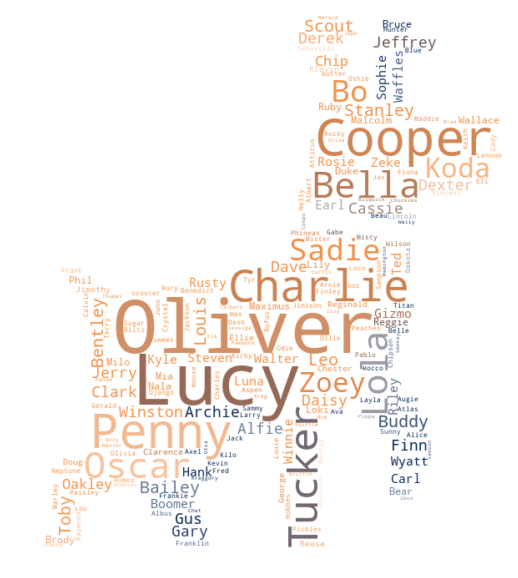

In [5]:
name=pic.name.dropna()# ÂéªÈô§Áº∫Â§±ÂÄº

dogmask=np.array(Image.open('dog3.png'))
gencolor=ImageColorGenerator(dogmask)

wc_dog = WordCloud(background_color="white",collocations=False,mask=dogmask,color_func=gencolor)
wc_dog.generate(' '.join(name))

plt.figure(figsize=(10,10))
plt.imshow(wc_dog, interpolation='bilinear')
plt.axis('off')
plt.show()

ÂèØ‰ª•ÁúãÂá∫: oliver, copper, lucy, penny...Ëøô‰∫õÂêçÂ≠óÊØîËæÉÂèóÊ¨¢Ëøé.

#### 2. ËØÑÂàÜ„ÄÅÂñúÁà±Èáè„ÄÅËΩ¨ÂèëÈáèÈöèÊó∂Èó¥Â¶Ç‰ΩïÂèòÂåñÔºü

D:\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


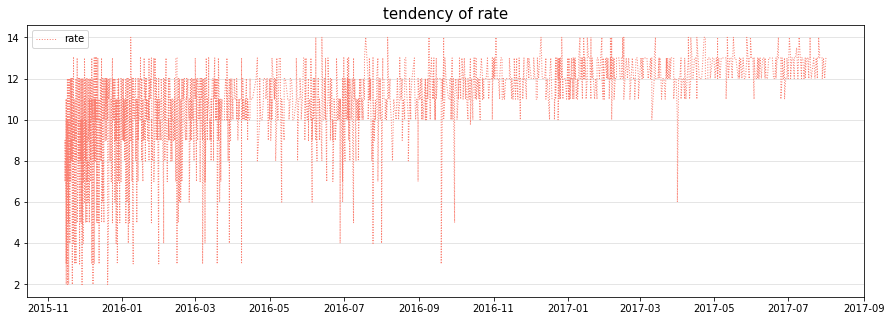

In [64]:
# ËØÑÂàÜÈöèÊó∂Èó¥ÁöÑÂèòÂåñ

plt.figure(figsize=(15,5))
# ÂéªÊéâÊûÅÁ´ØÂÄº
pic.rate = pic.rate[(pic.rate <20) &(pic.rate >1)]

plt.plot(pic.day,pic.rate,color='salmon',linewidth=1,ls=':',alpha=1)

plt.title('tendency of rate',fontsize = 15)

plt.legend(labels = ['rate'], loc = 'best')
plt.grid(axis='y',alpha= 0.4)

‰ªéÂõæ‰∏≠ÁúãÂá∫, Â§ßËá¥Âú®2015.11-2016.11Ëøô‰∏™Êó∂Èó¥ËåÉÂõ¥ÂÜÖ,ËØÑÂàÜÊï∞ÈáèÊØîËæÉÂØÜÈõÜ, ÂàÜÊï∞Ê≥¢Âä®ÊØîËæÉÂ§ß; 2016.11-2017.08Ëøô‰∏™Âå∫Èó¥ÂÜÖ, ËØÑÂàÜÊï∞ÈáèÈÄêÊ∏êÂáèÂ∞ë, ÊâìÂàÜÁöÑÂàÜÊï∞‰πüÁõ∏ÂØπË∂ã‰∫éÁ®≥ÂÆö.

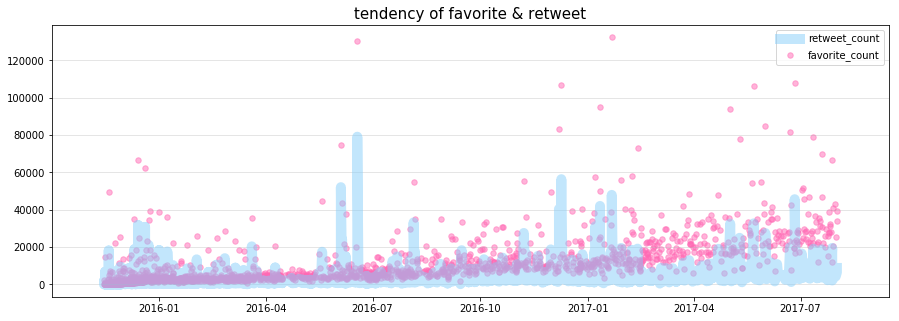

In [65]:
# ÂñúÁà±Èáè„ÄÅËΩ¨ÂèëÈáèÈöèÊó∂Èó¥ÁöÑÂèòÂåñ

plt.figure(figsize=(15,5))

plt.scatter(pic.day,pic.favorite_count,color='hotpink',s=30,alpha=.5)
plt.plot(pic.day,pic.retweet_count,color='lightskyblue',linewidth=10,alpha=.5)

plt.title('tendency of favorite & retweet',fontsize = 15)
plt.legend(labels = ['retweet_count','favorite_count'], loc = 'best')
plt.grid(axis='y',alpha=0.4)

‰ªéÂõæ‰∏≠ÁúãÂá∫, 2015.11-2016.09ËøôÊÆµÊó∂Èó¥ÂÜÖ, ÂñúÁà±ÈáèÂæÆÂæÆË∂ÖËøáËΩ¨ÂèëÈáè, ËÄå‰πãÂêéÂ∑ÆË∑ùÂä†Â§ß, Âà∞‰∫Ü2017Âπ¥‰ª•Âêé, ÂñúÁà±ÈáèËøúËøúË∂ÖËøáËΩ¨ÂèëÈáè.

#### 3. ÊØîËæÉÂèóÊ¨¢ËøéÁöÑÂìÅÁßçÊúâÂì™‰∫õ,ÂàÜÂà´Âú®Âì™‰∫õÊúà‰ªΩÊúÄÂèóÊ¨¢ËøéÔºüÔºàÂèóÊ¨¢ËøéÔºöÂñúÁà±ÈáèÔºåËΩ¨ÂèëÈáèÔºõÊúà‰ªΩÊéßÂà∂Â§ßÂ∞è„ÄÅÈ¢úËâ≤Ôºâ

In [66]:
# ÂêàÂπ∂ÂìÅÁßçÂíåÊúà‰ªΩ
note = []
count=0
for i in pic.index:
    notes = pic.p1[i],pic.mon[i]
    note.append(notes)
count+=1

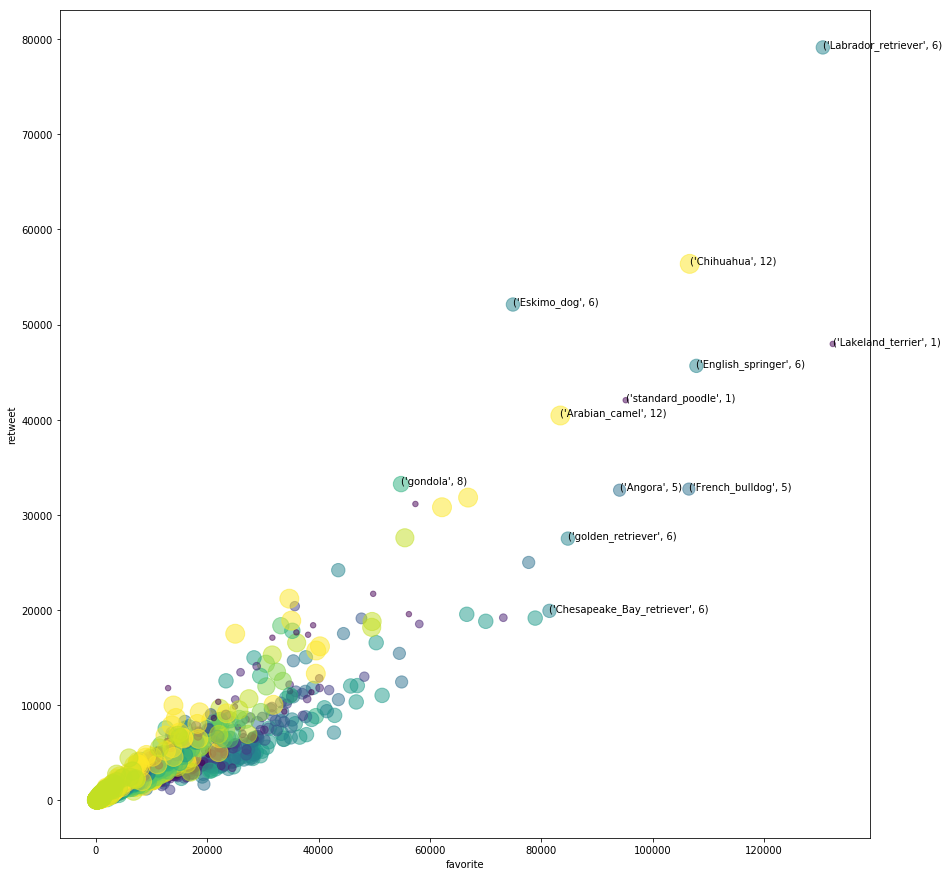

In [67]:
x = pic['favorite_count']
y = pic['retweet_count']

plt.scatter(x,y, c=pic['mon'],s=pic['mon']*30, alpha=0.5)

plt.xlabel("favorite")
plt.ylabel("retweet")

for i in x.index:
    if (x[i]>80000) or (y[i] > 32000): #Êï∞ÊçÆÁöÑÈÄâÂèñÂè™ÊòØ‰∏∫‰∫ÜÁæéËßÇ,Ê≤°ÊúâÂÖ∂‰ªñÁâπÂà´ÁöÑÊÑè‰πâ
        plt.annotate(note[i], xy = (x[i], y[i]), xytext = (x[i]+0.1, y[i]+0.1),size=10,alpha=1)
    
plt.subplots_adjust(right=2,top=3)
plt.show() 

#### ‰ªéÊï£ÁÇπÂõæÂàÜÂ∏ÉÊù•Áúã
Labrador_retriever, Chihuahua, Eskimo_dog, Lakeland_terrier,English_springer, Standard_poodle, Arabian_camal, French_bulldog, Angora, gondolaËøô‰∫õÂìÅÁßçÁöÑÂÆ†Áâ©ÁãóÊØîËæÉÂèóÊ¨¢Ëøé.

####  ÊúâË∂£ÁöÑÊòØ: 
- 6Êúà‰ªΩ, Labrador_retriever(ÊãâÂ∏ÉÊãâÂ§öÂØªÂõûÁä¨), Eskimo_dog(Áà±ÊñØÂü∫Êë©Áä¨), English_springer(Ëã±ÂõΩÂè≤ÂÆæÊ†ºÁä¨)...Áõ∏ÂØπËæÉÂèóÊ¨¢Ëøé;
- 12Êúà‰ªΩ, Chihuahua(ÂêâÂ®ÉÂ®É), Arabian_camal(ÈòøÊãâ‰ºØÁÅµÁºáÁä¨)...Áõ∏ÂØπËæÉÂèóÊ¨¢Ëøé;
- 1Êúà‰ªΩ, Lakeland_terrier(ÊπñÁïîÊ¢óÁä¨),Standard_poodle(Ê†áÂáÜË¥µÂÆæÁä¨)...Áõ∏ÂØπËæÉÂèóÊ¨¢Ëøé;
- 5Êúà‰ªΩ,Angora(ÂÆâÂì•È≤ÅÁä¨),French_bulldog(Ê≥ïÂõΩÊñóÁâõÁä¨)...Áõ∏ÂØπËæÉÂèóÊ¨¢Ëøé;

‰∏çÂêåÊúà‰ªΩ,ÂèóÊ¨¢ËøéÁöÑÂÆ†Áâ©ÁãóÂìÅÁßçÊúâÊâÄ‰∏çÂêå,ËøôÊàñËÆ∏Ë∑üÂÆÉ‰ª¨ÁöÑÁîüÊ¥ª‰π†ÊÄßÊúâÂÖ≥.

#### 4. Âì™‰∫õÂõ†Á¥†ÂèØËÉΩ‰∏éËØÑÂàÜÊúâÂÖ≥Ôºü

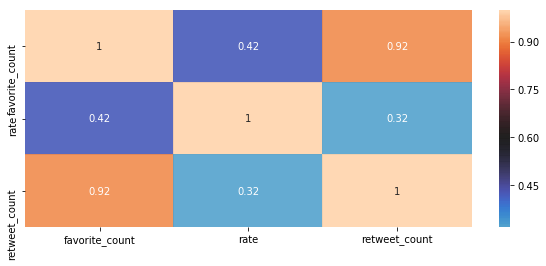

In [68]:
plt.figure(figsize=(10,4))

rate_pic = pic[['favorite_count','rate','retweet_count']].corr()
sns.heatmap(rate_pic,annot=True,center=0.6,alpha=0.9)

> 0.8-1.0 ÊûÅÂº∫Áõ∏ÂÖ≥Ôºå0.6-0.8 Âº∫Áõ∏ÂÖ≥Ôºå0.4-0.6 ‰∏≠Á≠âÁ®ãÂ∫¶Áõ∏ÂÖ≥Ôºå0.2-0.4 Âº±Áõ∏ÂÖ≥Ôºå0.0-0.2 ÊûÅÂº±Áõ∏ÂÖ≥ÊàñÊó†Áõ∏ÂÖ≥

ÂñúÁà±Èáè‰∏éËΩ¨ÂèëÈáèÁ≥ªÊï∞‰∏∫0.91ÔºåÂº∫Áõ∏ÂÖ≥Ôºõ
ÂñúÁà±Èáè‰∏éËØÑÂàÜÁ≥ªÊï∞‰∏∫0.41Ôºå‰∏≠Â∫¶Áõ∏ÂÖ≥Ôºõ
ËΩ¨ÂèëÈáè‰∏éËØÑÂàÜÁ≥ªÊï∞‰∏∫0.31ÔºåÂº±Áõ∏ÂÖ≥